#**Logistic Regression***
#***Problem Statement*

***An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.***


***The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.***

*Data
You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted.*

#***Goal***

***Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.***

In [1]:
# supress warning
import warnings
warnings.filterwarnings('ignore')

In [3]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  **Data Preprocessing**

**data loading**

In [4]:
data = pd.read_csv('Leads.csv')
data.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened


In [5]:
# checking data duplicate
sum(data.duplicated(subset = 'Prospect ID')) == 0
# == 0 no duplicate data in this column print(True/False)

True

#**Data Inspection**

In [6]:
data.shape

(9240, 37)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [9]:
data.skew()

Lead Number                     0.140451
Converted                       0.471058
TotalVisits                    19.911657
Total Time Spent on Website     0.956450
Page Views Per Visit            2.871793
Asymmetrique Activity Score    -0.383380
Asymmetrique Profile Score      0.221739
dtype: float64

***Data Cleaning**

In [10]:
# As we can observe that there are a many more value in selected form in this datab sets
# if any customer does not select any list hense it return select
# Select values are as good as NULL.

# Converting 'Select' values to NaN.
data = data.replace('Select', np.nan)  # converting select to nan value by numpy np.nan

In [11]:
data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [12]:
len(data.index)

9240

In [13]:
round(100*(data.isnull().sum()/len(data.index))) 
# null value converting a percentage null value 

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

In [14]:
# we will drop column in which more than 70% NA value
data = data.drop(data.loc[:,list(round(100*(data.isnull().sum()/len(data.index)), 2)>70)].columns, 1)

In [15]:
data.shape

(9240, 35)

In [16]:
# Now we will take care of null values in each column one by one.
# Lead Quality: Indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead

In [17]:
data['Lead Quality'].describe()

count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object

## univariate analysis

<AxesSubplot:xlabel='Lead Quality', ylabel='count'>

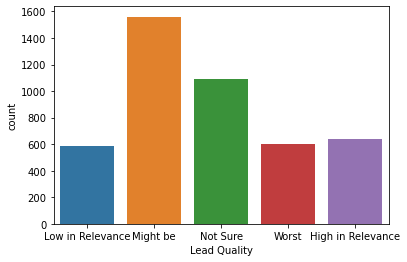

In [18]:
# for checking the quality of of lead by some categories
sns.countplot(data['Lead Quality'])

In [19]:
# lets see might be is the quality of Lead Quality column is more than other catagory

In [20]:
data['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [21]:
# the lead quality nan is also nan value so its convert into (Not Sure) value

data['Lead Quality'] = data['Lead Quality'].replace(np.nan, 'Not Sure')

<AxesSubplot:xlabel='Lead Quality', ylabel='count'>

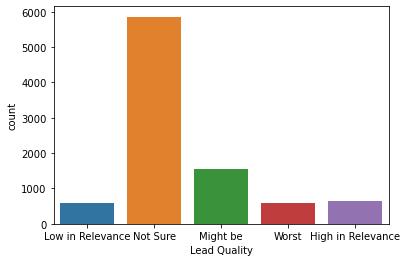

In [22]:
sns.countplot(data['Lead Quality'])

In [23]:
data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

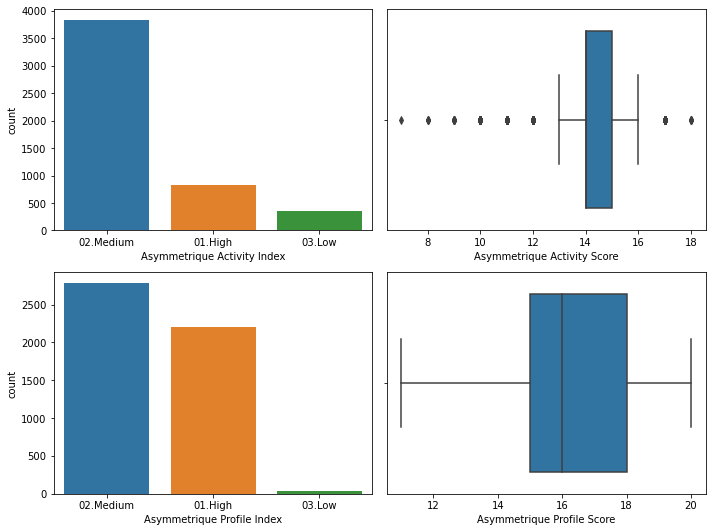

In [24]:
fig, axs = plt.subplots(2,2, figsize = (10,7.5))
plt1 = sns.countplot(data['Asymmetrique Activity Index'], ax = axs[0,0])
plt2 = sns.boxplot(data['Asymmetrique Activity Score'], ax = axs[0,1])
plt3 = sns.countplot(data['Asymmetrique Profile Index'], ax = axs[1,0])
plt4 = sns.boxplot(data['Asymmetrique Profile Score'], ax = axs[1,1])
plt.tight_layout()  # for big sight of plot

In [25]:
# There is too much variation in thes parameters so its not reliable to impute any value in it. 
# 45% null values means we need to drop these columns.

In [26]:
data.shape

(9240, 35)

In [27]:
data = data.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'],1)

In [28]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [30]:
# City

data.City.describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

In [31]:
data['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [34]:
data.shape

(9240, 31)

<AxesSubplot:xlabel='count', ylabel='City'>

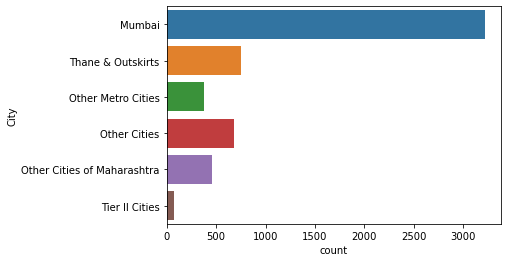

In [33]:
sns.countplot(data=data, y='City')
#   xticks(rotation = 90)

In [33]:
# Around 60% of the data is Mumbai so we can impute Mumbai in the missing values.

In [35]:
data['City'] = data['City'].replace(np.nan, 'Mumbai')

<AxesSubplot:xlabel='count', ylabel='City'>

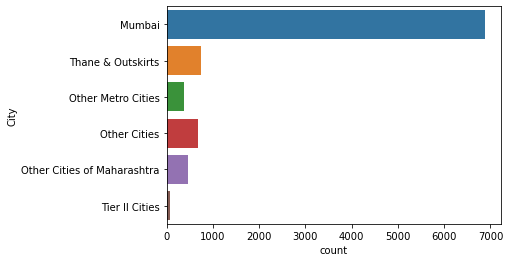

In [36]:
sns.countplot(data=data, y='City')


In [37]:
# Specailization

data.Specialization.describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

In [38]:
data['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Specialization'>

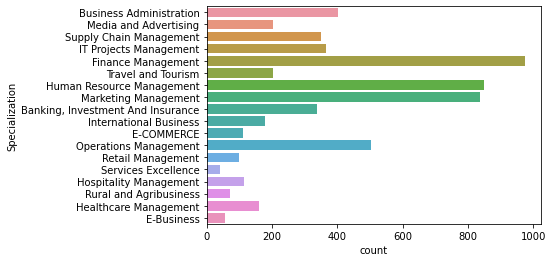

In [39]:
sns.countplot(data=data, y='Specialization')



In [40]:
# It maybe the case that lead has not entered any specialization if his/her option is not availabe on the list,
#  may not have any specialization or is a student.
# Hence we can make a category "Others" for missing values. 

In [41]:
data['Specialization'] = data['Specialization'].replace(np.nan, 'Others')

In [42]:
data.shape

(9240, 31)

In [43]:
data.Tags.describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

In [44]:
data['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

<AxesSubplot:xlabel='count', ylabel='Tags'>

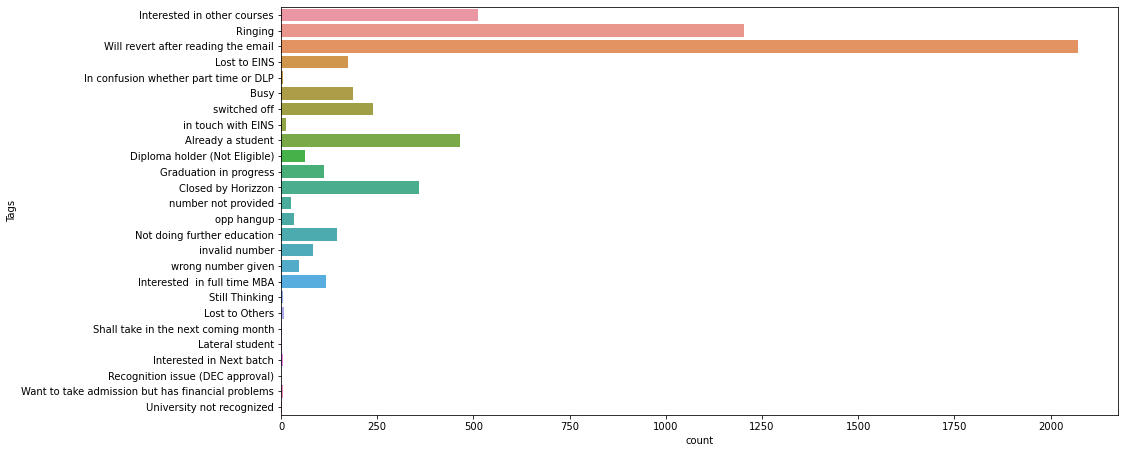

In [45]:
fig = plt.subplots(figsize = (15,7.5))
sns.countplot(data=data, y='Tags')

In [46]:
# Blanks in the tag column may be imputed by 'Will revert after reading the email'.
data['Tags'] = data['Tags'].replace(np.nan, 'Will revert after reading the email')

In [47]:
data['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

In [48]:
data['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [49]:
data['What matters most to you in choosing a course'] = data['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

In [50]:
# Occupation

data['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

In [51]:
data['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [52]:
data['What is your current occupation'] = data['What is your current occupation'].replace(np.nan, 'Unemployed')

In [53]:
# Country


data['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [54]:
# Country is India for most values so let's impute the same in missing values.
data['Country'] = data['Country'].replace(np.nan, 'India')

In [55]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [56]:
# Rest missing values are under 2% so we can drop these rows.
data.dropna(inplace = True)

In [57]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

In [58]:
data.shape

(9074, 31)

In [59]:
data.to_csv('Leads_cleaned.csv')

# **Now Data is clean and we can start with the analysis part**

***Exploratory Data Analytics**

**Univariate Analysis**

In [60]:
data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [61]:
data['Converted']

0       0
1       0
2       1
3       0
4       1
       ..
9235    1
9236    0
9237    0
9238    1
9239    1
Name: Converted, Length: 9074, dtype: int64

In [62]:
# Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0).

In [63]:
Converted = (sum(data['Converted'])/len(data['Converted'].index))*100
Converted

37.85541106458012

<AxesSubplot:xlabel='count', ylabel='Lead Origin'>

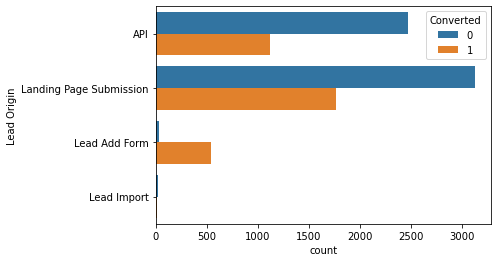

In [64]:
sns.countplot(y= 'Lead Origin', hue = 'Converted', data = data)


#***Inference**
API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are considerable.

Lead Add Form has more than 90% conversion rate but count of lead are not very high.

Lead Import are very less in count.
To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

<AxesSubplot:xlabel='count', ylabel='Lead Source'>

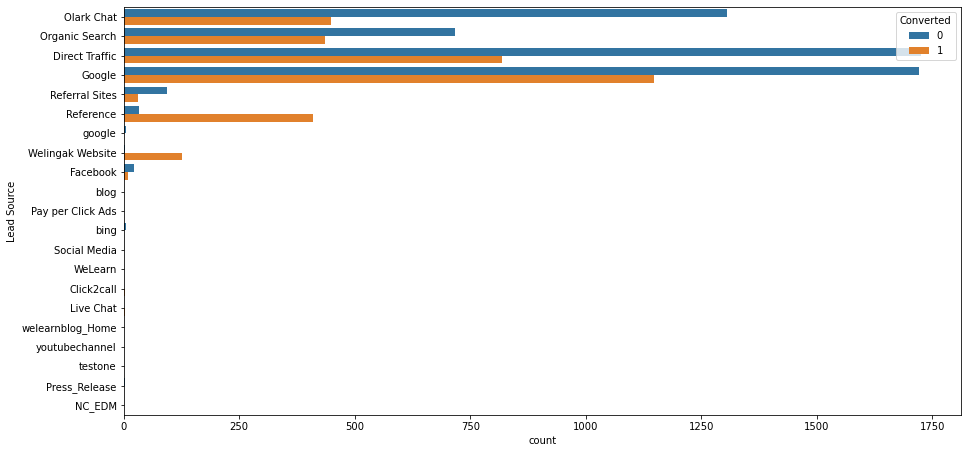

In [65]:
fig= plt.subplots(figsize = (15,7.5))
sns.countplot(y = "Lead Source", hue = "Converted", data = data)


In [66]:
data['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [67]:
data['Lead Source'] = data['Lead Source'].replace(['google'], 'Google')
data['Lead Source'] = data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

In [68]:
data['Lead Source'].value_counts()

Google              2873
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Facebook              31
Others                23
Name: Lead Source, dtype: int64

#***Inference**
Google and Direct traffic generates maximum number of leads.

Conversion Rate of reference leads and leads through 

welingak website is high.

To improve overall lead conversion rate, focus should be on 

improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

## Do Not Email & Do Not Call

<AxesSubplot:xlabel='Do Not Call', ylabel='count'>

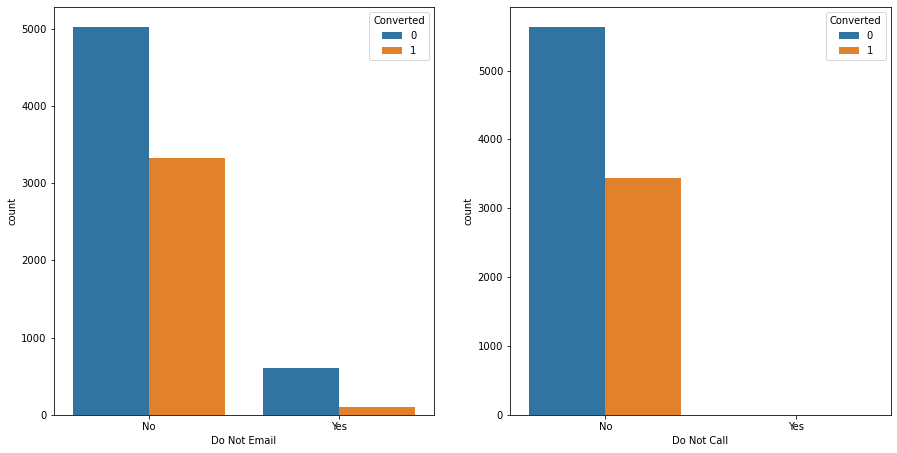

In [69]:
fig, axs = plt.subplots(1,2,figsize = (15,7.5))
sns.countplot(x = "Do Not Email", hue = "Converted", data = data, ax = axs[0])
sns.countplot(x = "Do Not Call", hue = "Converted", data = data, ax = axs[1])

In [70]:
data['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

<AxesSubplot:xlabel='TotalVisits'>

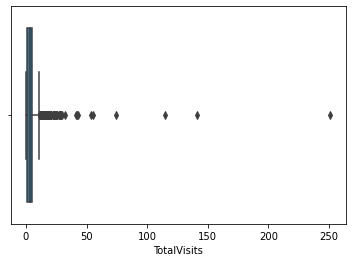

In [71]:
sns.boxplot(data['TotalVisits'])

In [72]:
# As we can see there are a number of outliers in the data.
# We will cap the outliers to 95% value for analysis.

In [73]:
percentiles = data['TotalVisits'].quantile([0.05,0.95]).values
percentiles

array([ 0., 10.])

In [74]:
percentiles = data['TotalVisits'].quantile([0.05,0.95]).values
data['TotalVisits'][data['TotalVisits'] <= percentiles[0]] = percentiles[0]
data['TotalVisits'][data['TotalVisits'] >= percentiles[1]] = percentiles[1]

<AxesSubplot:xlabel='TotalVisits'>

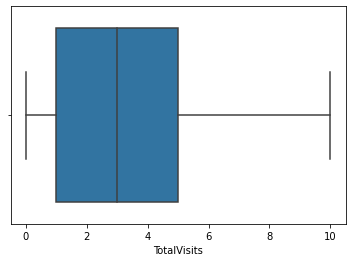

In [75]:
sns.boxplot(data['TotalVisits'])

<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

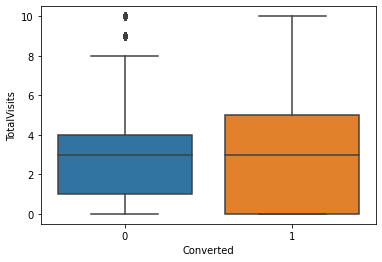

In [80]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = data)

#***Inference***


Median for converted and not converted leads are the same.
Nothng conclusive can be said on the basis of Total Visits.

## Total time spent on website

In [81]:
data['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

<AxesSubplot:xlabel='Total Time Spent on Website'>

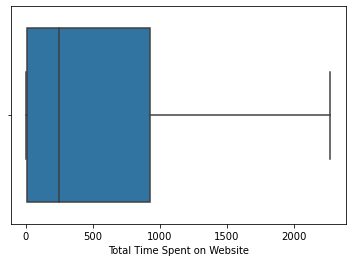

In [82]:
sns.boxplot(data['Total Time Spent on Website'])

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

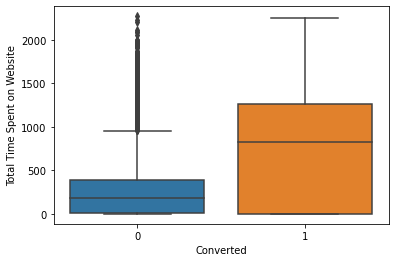

In [83]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = data)

#***Inference**
Leads spending more time on the weblise are more likely to be converted.

Website should be made more engaging to make leads spend more time.

In [84]:
data['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

<AxesSubplot:xlabel='Page Views Per Visit'>

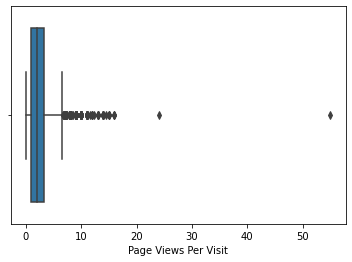

In [85]:
sns.boxplot(data['Page Views Per Visit'])

In [86]:
# As we can see there are a number of outliers in the data.
# We will cap the outliers to 95% value for analysis.

In [87]:
percentiles = data['Page Views Per Visit'].quantile([0.05,0.95]).values
data['Page Views Per Visit'][data['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
data['Page Views Per Visit'][data['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

<AxesSubplot:xlabel='Page Views Per Visit'>

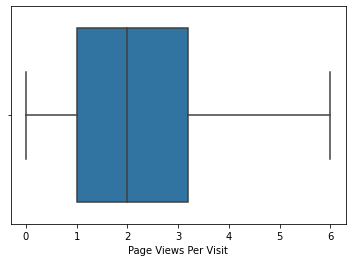

In [88]:
sns.boxplot(data['Page Views Per Visit'])

<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

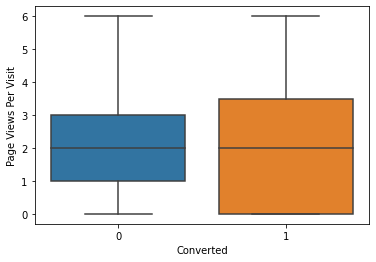

In [89]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = data)

In [90]:
data['Last Activity'].describe()

count             9074
unique              17
top       Email Opened
freq              3432
Name: Last Activity, dtype: object

<AxesSubplot:xlabel='count', ylabel='Last Activity'>

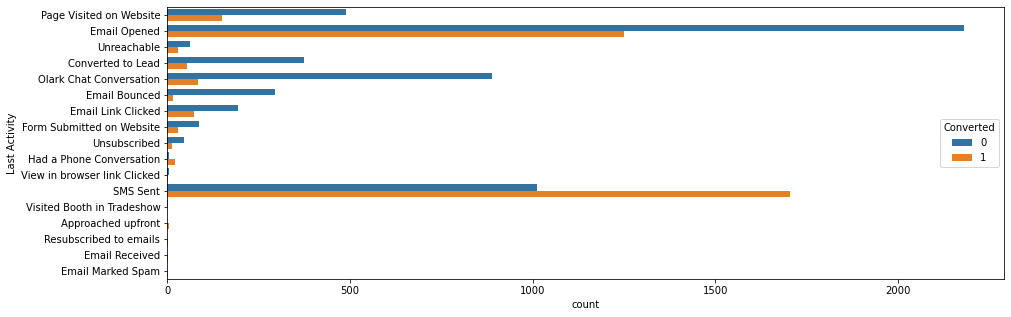

In [91]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(y = "Last Activity", hue = "Converted", data = data)


In [92]:
data['Last Activity'].value_counts()

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [93]:
# Let's keep considerable last activities as such and club all others to "Other_Activity"
data['Last Activity'] = data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

<AxesSubplot:xlabel='count', ylabel='Last Activity'>

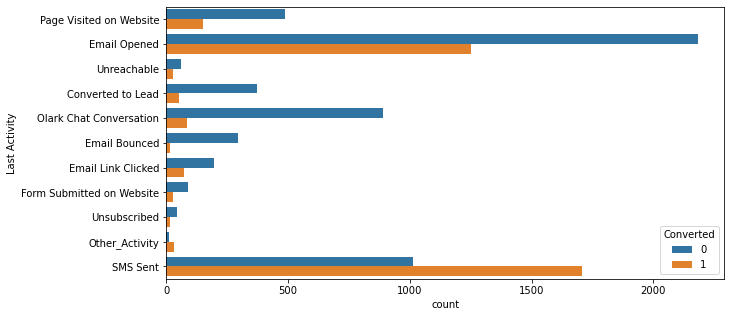

In [94]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(y = "Last Activity", hue = "Converted", data = data)


#***Inference***

Most of the lead have their Email opened as their last activity.
Conversion rate for leads with last activity as SMS Sent is almost 60%.b

In [95]:
data.Country.describe()

count      9074
unique       38
top       India
freq       8787
Name: Country, dtype: object

## Specialization

In [96]:
data.Specialization.describe()

count       9074
unique        19
top       Others
freq        3282
Name: Specialization, dtype: object

In [97]:
data['Specialization'] = data['Specialization'].replace(['Others'], 'Other_Specialization')

<AxesSubplot:xlabel='count', ylabel='Specialization'>

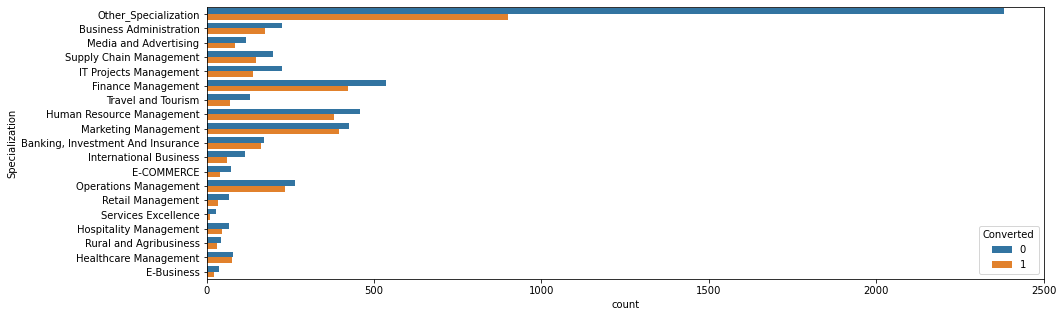

In [98]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(y = "Specialization", hue = "Converted", data = data)

#**Inference**
Focus should be more on the Specialization with high conversion rate

In [99]:
data['What is your current occupation'].describe()

count           9074
unique             6
top       Unemployed
freq            8159
Name: What is your current occupation, dtype: object

In [100]:
data['What is your current occupation'] = data['What is your current occupation'].replace(['Other'], 'Other_Occupation')

<AxesSubplot:xlabel='What is your current occupation', ylabel='count'>

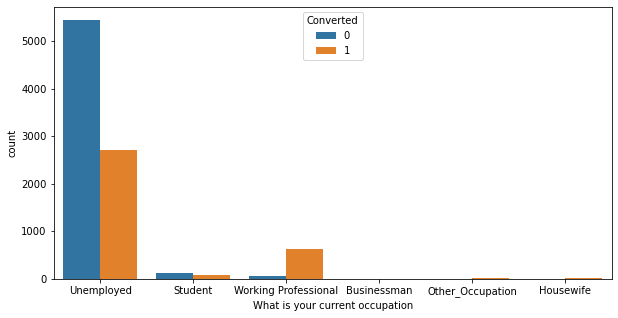

In [101]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = data)

#***Inference***
Working Professionals going for the course have high chances of joining it.

Unemployed leads are the most in numbers but has around 30-35% conversion rate.

In [102]:
data['What matters most to you in choosing a course'].describe()

count                        9074
unique                          3
top       Better Career Prospects
freq                         9072
Name: What matters most to you in choosing a course, dtype: object

#**Inference**
Most entries are 'Better Career Prospects'. No Inference can be drawn with this parameter

In [103]:
data.Search.describe()

count     9074
unique       2
top         No
freq      9060
Name: Search, dtype: object

#Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

In [104]:
data.Magazine.describe()

count     9074
unique       1
top         No
freq      9074
Name: Magazine, dtype: object

#Inference
Most entries are 'No'. No Inference can be drawn with this parameter

In [105]:
data['Newspaper Article'].describe()

count     9074
unique       2
top         No
freq      9072
Name: Newspaper Article, dtype: object

#Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

In [106]:
data['X Education Forums'].describe()

count     9074
unique       2
top         No
freq      9073
Name: X Education Forums, dtype: object

#Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

In [107]:
data['Newspaper'].describe()

count     9074
unique       2
top         No
freq      9073
Name: Newspaper, dtype: object

#Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

In [108]:
data['Digital Advertisement'].describe()

count     9074
unique       2
top         No
freq      9070
Name: Digital Advertisement, dtype: object

In [109]:
data['Through Recommendations'].describe()

count     9074
unique       2
top         No
freq      9067
Name: Through Recommendations, dtype: object

In [110]:
data['Receive More Updates About Our Courses'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Receive More Updates About Our Courses, dtype: object

In [111]:
data['Tags'].describe()

count                                    9074
unique                                     26
top       Will revert after reading the email
freq                                     5343
Name: Tags, dtype: object

<AxesSubplot:xlabel='count', ylabel='Tags'>

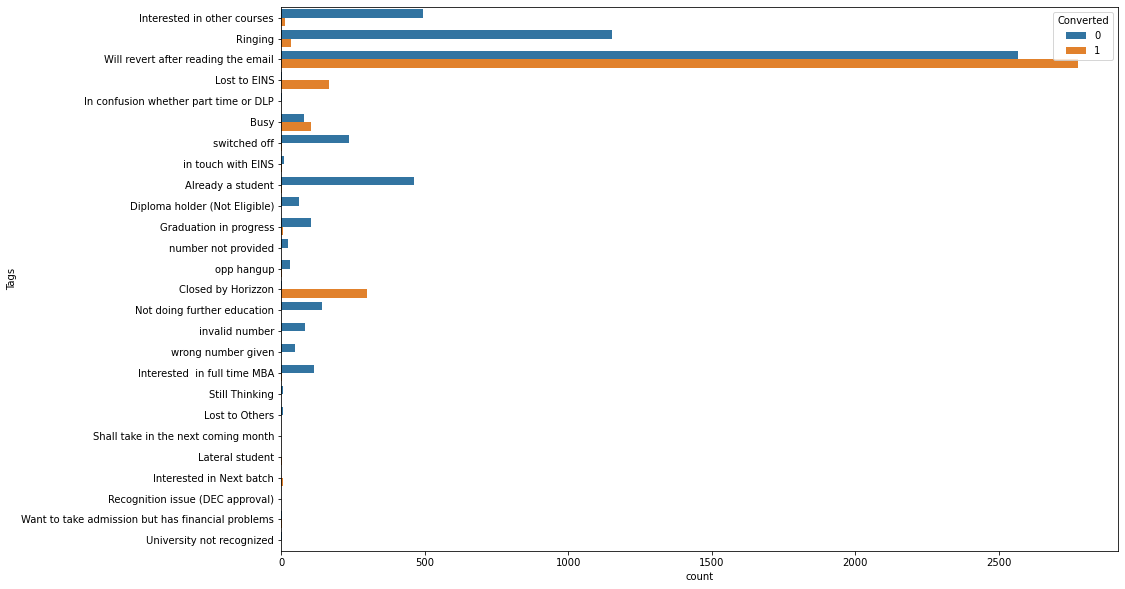

In [112]:
fig, axs = plt.subplots(figsize = (15,10))
sns.countplot(y = "Tags", hue = "Converted", data = data)

In [113]:
data['Tags'].value_counts()

Will revert after reading the email                  5343
Ringing                                              1187
Interested in other courses                           509
Already a student                                     465
Closed by Horizzon                                    301
switched off                                          240
Busy                                                  185
Lost to EINS                                          172
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    25
in touch with EINS                                     12
Lost to Others

In [114]:
# Let's keep considerable last activities as such and club all others to "Other_Activity"
data['Tags'] = data['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

<AxesSubplot:xlabel='count', ylabel='Tags'>

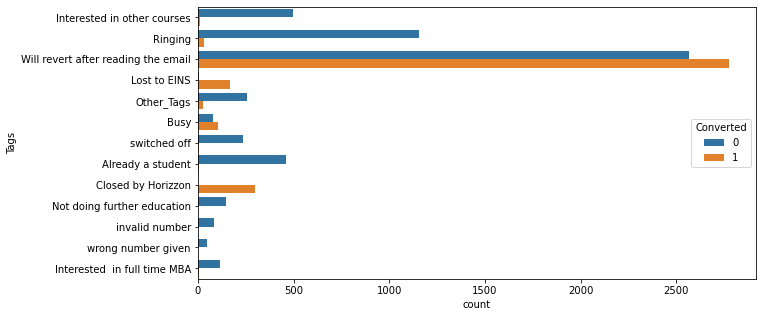

In [115]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(y = "Tags", hue = "Converted", data = data)

In [116]:
data['Lead Quality'].describe()

count         9074
unique           5
top       Not Sure
freq          5806
Name: Lead Quality, dtype: object

<AxesSubplot:xlabel='Lead Quality', ylabel='count'>

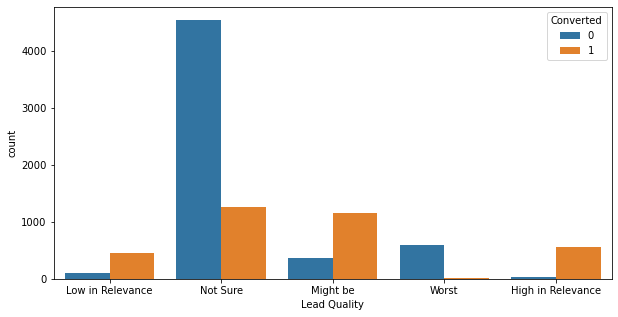

In [117]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Lead Quality", hue = "Converted", data = data)

In [118]:
data['Update me on Supply Chain Content'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Update me on Supply Chain Content, dtype: object

In [119]:
data['Get updates on DM Content'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Get updates on DM Content, dtype: object

In [120]:
data['I agree to pay the amount through cheque'].describe()

count     9074
unique       1
top         No
freq      9074
Name: I agree to pay the amount through cheque, dtype: object

In [121]:
data['A free copy of Mastering The Interview'].describe()

count     9074
unique       2
top         No
freq      6186
Name: A free copy of Mastering The Interview, dtype: object

In [122]:
data.City.describe()

count       9074
unique         6
top       Mumbai
freq        6752
Name: City, dtype: object

<AxesSubplot:xlabel='count', ylabel='City'>

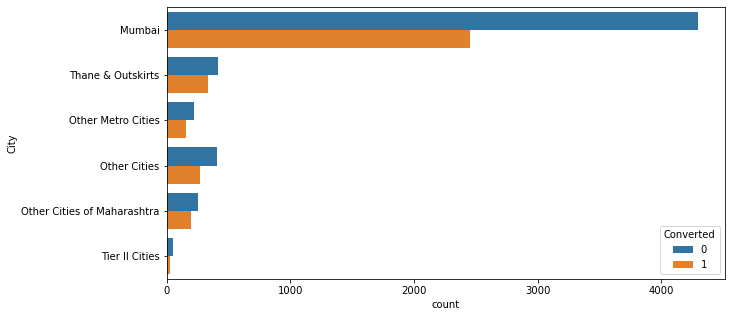

In [123]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(y = "City", hue = "Converted", data = data)

#Inference
Most leads are from mumbai with around 30% conversion rate

In [124]:
data['Last Notable Activity'].describe()

count         9074
unique          16
top       Modified
freq          3267
Name: Last Notable Activity, dtype: object

<AxesSubplot:xlabel='count', ylabel='Last Notable Activity'>

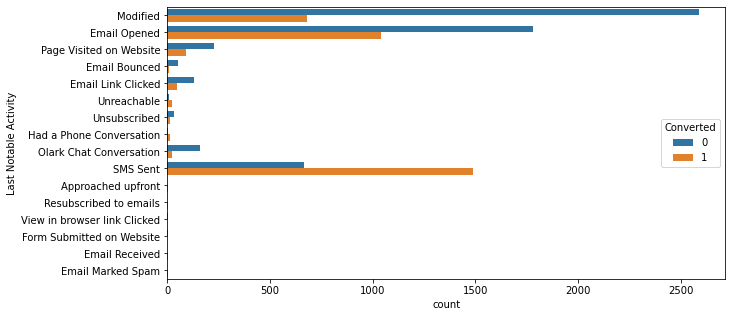

In [125]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(y = "Last Notable Activity", hue = "Converted", data = data)

#Results
Based on the univariate analysis we have seen that many columns are not adding any information to the model, heance we can drop them for frther analysis

In [126]:
data = data.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country'],1)

In [127]:
data.shape

(9074, 16)

In [128]:
data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Other_Specialization,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Other_Specialization,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Other_Specialization,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


#  Data Preparation


Converting some binary variables (Yes/No) to 1/0

In [129]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
data[varlist] = data[varlist].apply(binary_map)

***For categorical variables with multiple levels, create dummy features (one-hot encoded)***

In [130]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Last Notable Activity']], drop_first=True)
dummy1.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [131]:
# Adding the results to the master dataframe
data = pd.concat([data, dummy1], axis=1)
data.head(3)

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0


In [132]:
data = data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','Tags','Lead Quality','City','Last Notable Activity'], axis = 1)

In [133]:
data.head(3)

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [134]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X for making a independent variable for axis X
X = data.drop(['Prospect ID','Converted'], axis=1)

In [135]:
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [136]:
# make a  response variable or label in the form of binary class classification to y
y = data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [137]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

In [138]:
y_test

465     0
5424    0
3503    0
4465    0
5394    0
       ..
3436    1
1621    0
7665    0
7274    0
2042    1
Name: Converted, Length: 2723, dtype: int64

In [139]:
y_test.to_csv('test.csv', index = False)

In [141]:
# When your data has different values, and even different measurement units,
# it can be difficult to compare them. What is kilograms compared to meters? Or altitude compared to time?
# The answer to this problem is scaling. We can scale data into new values that are easier to compare.
# formula is New_value = (original_value - mean)/std

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1943,0,0,-0.432839,1.704380,-0.147676,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
456,0,0,-0.432839,-0.789845,-0.147676,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6547,0,0,0.644762,-0.176811,1.544362,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8836,0,0,0.285562,2.117949,0.980349,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6529,0,0,0.644762,0.315446,1.544362,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [142]:
# Checking the Churn Rate
Converted = (sum(data['Converted'])/len(data['Converted'].index))*100
Converted

37.85541106458012

## it means we have almost 38% customer converted for taking course

In [143]:
from sklearn.preprocessing import LabelEncoder       # convert categorical column to numerical value (1,2,3,4,5....)
from sklearn.preprocessing import StandardScaler, MinMaxScaler   # converting standard scaling
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer, recall_score, f1_score

In [144]:
scores = []
clfs = [LogisticRegression(class_weight='balanced', random_state=42), 
        DecisionTreeClassifier(class_weight='balanced', random_state=42), 
        RandomForestClassifier(class_weight='balanced', random_state=42), 
        KNeighborsClassifier(), GaussianNB(), SVC(random_state=42),
        GradientBoostingClassifier(random_state=42),
        BaggingClassifier(random_state=42)
        ]

In [145]:
for clf in clfs:
  # Extracting model name
  model_name = type(clf).__name__

  # Fit the model on train data
  clf.fit(X_train, y_train)

  # Make predictions using test data
  y_pred = clf.predict(X_test)

  # Make predictions using train data
  y_train_pred = clf.predict(X_train)

  # F1 on train set
  f1_train = f1_score(y_train, y_train_pred)

  # F1 on test set
  f1_test = f1_score(y_test, y_pred)

  # Display the accuracy of the model
  print('Performance Metrics for', model_name, ':')

  print('[F1-Score Train]:', f1_train)

  print('[F1-Score Test]:', f1_test)
  print('--------------------\n')

  scores.append((model_name, f1_train,f1_test))

Performance Metrics for LogisticRegression :
[F1-Score Train]: 0.8949124270225187
[F1-Score Test]: 0.6108374384236454
--------------------

Performance Metrics for DecisionTreeClassifier :
[F1-Score Train]: 0.9829859634198215
[F1-Score Test]: 0.7552108579738245
--------------------

Performance Metrics for RandomForestClassifier :
[F1-Score Train]: 0.9827622898489041
[F1-Score Test]: 0.846153846153846
--------------------

Performance Metrics for KNeighborsClassifier :
[F1-Score Train]: 0.8864983534577386
[F1-Score Test]: 0.6037282020444978
--------------------

Performance Metrics for GaussianNB :
[F1-Score Train]: 0.803072625698324
[F1-Score Test]: 0.6023948418790297
--------------------

Performance Metrics for SVC :
[F1-Score Train]: 0.9116809116809116
[F1-Score Test]: 0.37972768532526474
--------------------

Performance Metrics for GradientBoostingClassifier :
[F1-Score Train]: 0.9142981123888045
[F1-Score Test]: 0.8469167744717551
--------------------

Performance Metrics for Ba

In [146]:
models = pd.DataFrame(data=scores, columns=['Model', 'Train F1', 'Test F1'])
models

,Model,Train F1,Test F1
0,LogisticRegression,0.894912,0.610837
1,DecisionTreeClassifier,0.982986,0.755211
2,RandomForestClassifier,0.982762,0.846154
3,KNeighborsClassifier,0.886498,0.603728
4,GaussianNB,0.803073,0.602395
5,SVC,0.911681,0.379728
6,GradientBoostingClassifier,0.914298,0.846917
7,BaggingClassifier,0.973205,0.780030


In [147]:
models[['Model','Test F1']].sort_values(by='Test F1', ascending=False)

,Model,Test F1
6,GradientBoostingClassifier,0.846917
2,RandomForestClassifier,0.846154
7,BaggingClassifier,0.780030
1,DecisionTreeClassifier,0.755211
0,LogisticRegression,0.610837
3,KNeighborsClassifier,0.603728
4,GaussianNB,0.602395
5,SVC,0.379728


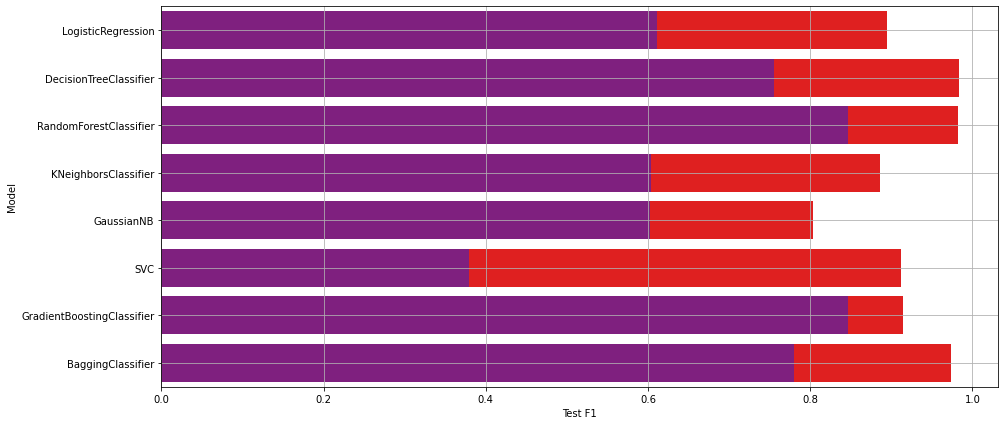

In [148]:
fig = plt.figure(figsize=(15,7))
sns.barplot(models['Train F1'], models['Model'], color='red')
sns.barplot(models['Test F1'], models['Model'], color='blue', alpha=0.5)
plt.grid(b=True)

**Observations:**

- We need to find a model which **fits better** on the data.

- We will proceed with hyperparameter tuning.

## **7.2 Hyperparameter Tuning**

- In this section, we will tune a **Random Forest Classifier**

### **Random Forest**

In [146]:
# Creating a parameter grid for Random Forest

# GSCV on RFC

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110, 120],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_cv = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2, scoring=make_scorer(f1_score))
rf_cv.fit(X_train, y_train)

# Printing metrics
print("[Hyperparameters]:", rf_cv.best_params_)
print("[Train Score]:", rf_cv.best_score_)
print("[Test Score]:", f1_score(y_test, rf_cv.predict(X_test)))

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


KeyboardInterrupt: 

# Test Sets

## we will select RandomForestModel as our final model



In [147]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [ 90],
    'max_features': [3],
    'min_samples_leaf': [3],
    'min_samples_split': [10],
    'n_estimators': [1000]}

final_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_cv = GridSearchCV(estimator = final_model , param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2, scoring=make_scorer(f1_score))
rf_cv.fit(X_train, y_train)
y_final_pre = rf_cv.predict(X_test)


Fitting 3 folds for each of 1 candidates, totalling 3 fits


In [156]:
y_final_pre

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

# **9. Conclusion**

---

- We can see that the Random Forest Classifier perform well after tuning.

- We can use these models on real time scenarios and determine the best model among them.

- We also see that **Severity** feature is **positively correlated** with the **Shape, Margin**, and **Age** features.